In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
from os.path import join, abspath, dirname

from mmcv import Config

from pyvrl.builder import build_dataset
from pyvrl.datasets.transforms import GroupToTensor

### Helpers

In [63]:
from torchvision.utils import make_grid
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs, figsize=(20, 8)):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False, figsize=figsize)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

### Setup

In [8]:
repo_path = dirname(dirname(abspath(".")))

In [9]:
cfg_path = join(repo_path, "configs/ctp/pretraining_runtime_ucf.py")

In [47]:
cfg = Config.fromfile(cfg_path)

### Check without any transforms

In [82]:
cfg.data.train.transform_cfg = [
    {
        'type': 'PatchMask',
        'region_sampler': {
            'scales': [16, 24, 28, 32, 48, 64],
            'ratios': [0.5, 0.67, 0.75, 1.0, 1.33, 1.5, 2.0],
            'scale_jitter': 0.18,
            'num_rois': 3
        },
       'key_frame_probs': [0.5, 0.3, 0.2],
       'loc_velocity': 3,
       'size_velocity': 0.025,
       'label_prob': 0.8
    },
    {
        'type': 'GroupToTensor',
        'switch_rgb_channels': False,
        'div255': True,
        'mean': None,
        'std': None,
    },
]

In [83]:
train_dataset = build_dataset(cfg.data.train, default_args={"data_dir": "/ssd/pbagad/datasets/"})

In [84]:
instance = train_dataset[0]

In [85]:
x = instance["imgs"].data

In [86]:
x.shape, x.max(), x.min()

(torch.Size([3, 16, 240, 320]), tensor(1.), tensor(0.))

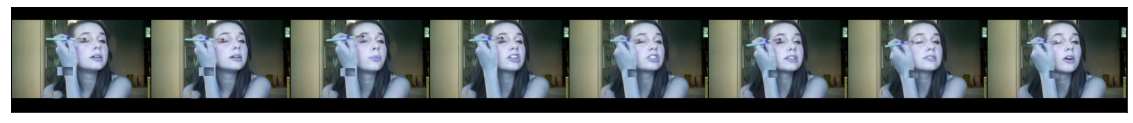

In [87]:
grid = make_grid(x.permute((1, 0, 2, 3))[:8])
show(grid)

### Check with `switch_to_rgb=True`

In [76]:
cfg.data.train.transform_cfg = [
    {
        'type': 'PatchMask',
        'region_sampler': {
            'scales': [16, 24, 28, 32, 48, 64],
            'ratios': [0.5, 0.67, 0.75, 1.0, 1.33, 1.5, 2.0],
            'scale_jitter': 0.18,
            'num_rois': 3
        },
       'key_frame_probs': [0.5, 0.3, 0.2],
       'loc_velocity': 3,
       'size_velocity': 0.025,
       'label_prob': 0.8
    },
    {
        'type': 'GroupToTensor',
        'switch_rgb_channels': True,
        'div255': True,
        'mean': None,
        'std': None,
    },
]

In [77]:
train_dataset = build_dataset(cfg.data.train, default_args={"data_dir": "/ssd/pbagad/datasets/"})

In [78]:
instance = train_dataset[0]

In [79]:
x = instance["imgs"].data

In [80]:
x.shape, x.max(), x.min()

(torch.Size([3, 16, 240, 320]), tensor(1.), tensor(0.))

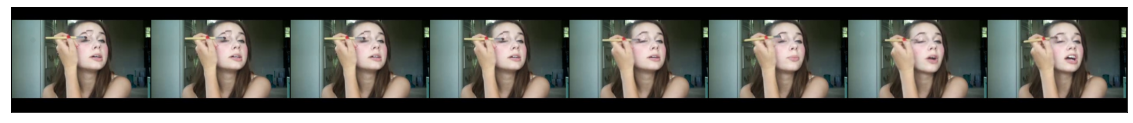

In [81]:
grid = make_grid(x.permute((1, 0, 2, 3))[:8])
show(grid)